In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Reading Data
data = pd.read_csv('/home/chathushka/Desktop/Reaserch/mydata.csv')
print(data.shape)
data.head()

(50000, 26)


,totalviews_channelelapsedtime,channelid,videocategoryid,channelviewcount,likes_subscriber,views_subscribers,videocount,subscribercount,videoid,dislikes_views,...,comments_views,totvideos_videocount,elapsedtime,videolikecount,videodislikecount,dislikes_subscriber,totviews_totsubs,views_elapsedtime,videopublished,videocommentcount
0,0.165199,UCdzU3DSGzyWzN2118yd9X9g,22,14654,0.555556,95.111111,30,18,--DwgB78t-c,0.000584,...,0.000000,488.466667,50040,10,1,0.055556,814.111111,0.034213,2012-01-19T18:38:28Z,0
1,1.133820,UC0UnhAG47DRyVZGVcbhAXhQ,10,105909,0.239130,59.326087,51,184,--NZRkXBV7k,0.000275,...,0.000183,2076.647059,22080,44,3,0.016304,575.592391,0.494384,2015-03-30T04:04:40Z,2
2,0.668120,UCXjtAvK5P3wXBGh0vbGylzg,27,48265,0.023669,10.289941,72,338,--hoQ2sGG4M,0.000288,...,0.000575,670.347222,71544,8,1,0.002959,142.795858,0.048613,2009-08-07T06:51:10Z,2
3,16.517982,UCpjYH_3HgCYCBEj5kOZ250A,26,625569,0.060052,11.130610,310,7710,--cPdta0k4Y,0.003344,...,0.001305,2017.964516,37464,463,287,0.037224,81.137354,2.290652,2013-06-27T03:09:09Z,112
4,0.839871,UCBFF3y6p-LqzD9bQSDgipgA,24,37895,0.237363,22.301099,8,455,--5iMsHNuDE,0.000394,...,0.001971,4736.875000,44040,108,4,0.008791,83.285714,0.230404,2012-09-26T15:10:52Z,20


In [3]:
#Calculatin X and Y
X = data['videoviewcount'].values
Y = data['videolikecount'].values 

for i in range(len(X)):
    if(X[i]>5000000):
         X[i]=np.mean(X)


In [4]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total Number of values
n = len(X)

# Using the formula to calculate b1 and b2
number = 0
den =0
for i in range(n):
    number+=(X[i] - mean_x)*(Y[i] - mean_y)
    den += (X[i] - mean_x) ** 2
b1 = number / den
b0 = mean_y - (b1 * mean_x)

#print coefficients
print(b1, b0)


0.005388844109663538 79.11527697430245


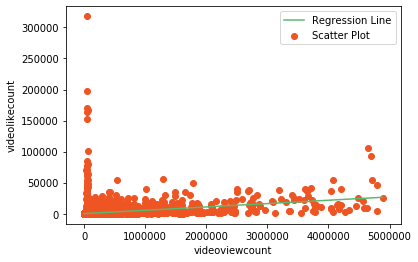

In [5]:
# Plotting values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

#Calculating Line Values x and y
x = np.linspace(min_x, max_x, 10) 
y = b0 + b1 * x

#ploting line
plt.plot(x, y, color='#58b970', label='Regression Line')
#plotting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('videoviewcount')
plt.ylabel('videolikecount')
plt.legend()
plt.show()

In [6]:
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = b0 +b1 * X[i]
    ss_t += (Y[i] - mean_y)**2
    ss_r += (Y[i] - y_pred) **2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.10940350576006053
